# Problem 4-141, Çengel.

ÇENGEL, Yunus A., BOLES, Michael A., KANOǦLU, Mehmet (2019). *Thermodynamics: an Engineering Approach*. 9th. ed., McGraw-Hill.

A piston–cylinder device initially contains 0.35 kg of steam at 3.5 MPa, superheated by 7.4°C. Now the steam loses heat to the surroundings and the piston moves down, hitting a set of stops at which point the cylinder contains saturated liquid water. The cooling continues until the cylinder contains water at 200°C. Determine: <br>

a. the final pressure. <br>
b. the quality (if mixture). <br>
c. the boundary work. <br>
d. the amount of heat transfer when the piston first hits the stops. <br>
e. the total heat transfer.

In [152]:
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt

pm.config["def_p"] = 100

water = pm.get("mp.H2O")

m_water = 0.35

## State 1

### Initial Pressure: 3500 kPa

In [153]:
pm.config["unit_pressure"] = "kPa"
p1 = 3500

### Temperature 1

In [154]:
T1 = water.Ts(p = p1) + 7.4
print('T1 :', np.round(T1,1),' K  = ', np.round(T1 - 273.15,1), 'ºC')

T1 : [523.1]  K  =  [250.] ºC


### Density & Specific Volume 1

In [155]:
d1 = water.d(T = T1, p = p1)
v1 = 1/d1
print('density :', np.round(d1,3),' kg/m3    specific volume:', np.round(v1,5),' m3/kg')

density : [17.022]  kg/m3    specific volume: [0.05875]  m3/kg


### Volume 1

In [156]:
V1 = m_water * v1
print('Volume 1 :', np.round(V1,5),' m3')

Volume 1 : [0.02056]  m3


## State 2

### Pressure 2 = Pressure 1

In [157]:
p2 = p1

### Temperature 2

In [158]:
T2 = water.Ts(p = p1)
print('T2 :', np.round(T2,1),' K  = ', np.round(T2 - 273.15,1), 'ºC')

T2 : [515.7]  K  =  [242.6] ºC


### Density & Specific Volume 2

In [159]:
d2 = water.ds(p = p2)[0]
v2 = 1/d2
print('density :', np.round(d2,3),' kg/m3    specific volume:', np.round(v2,6),' m3/kg')

density : [809.811]  kg/m3    specific volume: [0.001235]  m3/kg


### Volume 2

In [160]:
V2 = m_water * v2
print('Volume 2 :', np.round(V2,7),' m3')

Volume 2 : [0.0004322]  m3


## State 3

### Temperature 3

In [161]:
T3 = 200 + 273.15

### Pressure 3

In [162]:
p3 = water.ps(T = T3)
print('Pressure 3:', np.round(p3,1),' kPa')

Pressure 3: 1554.9  kPa


### Volume 3

In [163]:
d3 = water.d(T = T3, p = p3)
v3 = 1/d3
print('density :', np.round(d3,3),' kg/m3    specific volume:', np.round(v3,6),' m3/kg')

density : [864.658]  kg/m3    specific volume: [0.001157]  m3/kg


In [164]:
V3 = m_water * v3
print('Volume 3 :', np.round(V3,7),' m3')

Volume 3 : [0.0004048]  m3


### Enthalpy 3

In [165]:
h3 = water.h(T = T3, p = p3)
print('Enthalpy 3:', np.round(h3,2),' kJ/kg')

Enthalpy 3: [852.28]  kJ/kg


### Quality 3

In [166]:
water.T_h(h = 853, p = p3, quality = True)

(array([473.15]), array([0.00036774]))

## Proccess 1 --> 2

$ Q_{12} - W_{12} = \Delta U_{12} $

$ \Delta U_{12} = U_2 - U_1 $

In [167]:
u1 = water.e(T = T1, p = p1)
u2 = water.e(T = T2, p = p2)

Du12 = u2 - u1

print('Du12 =', np.round(u2,2),'-', np.round(u1,2),'=', np.round(Du12,2),' kJ/kg')

Du12 = [1045.48] - [2623.93] = [-1578.45]  kJ/kg


In [168]:
DU12 = m_water * Du12

print('DU12 =', np.round(DU12,2),'kJ')

DU12 = [-552.46] kJ


$ W_{12} = P_1 \cdot (V_2 - V_1) $

In [169]:
W12 = p1 * (v2 - v1)

print('W12 =', np.round(p1,4),' x (', np.round(v2,6),'-', np.round(v1,6),')=', np.round(W12,2),' kJ/kg')

W12 = 3500  x ( [0.001235] - [0.058748] )= [-201.3]  kJ/kg


$ Q_{12} = \Delta U_{12} + W_{12} $

In [170]:
Q12 = DU12 + W12

print('Q12 =', np.round(DU12,4),' + (', np.round(W12,6),'=', np.round(Q12,2),' kJ')

Q12 = [-552.456]  + ( [-201.296661] = [-753.75]  kJ


In [171]:
p = np.arange(1.,22063.)
T = water.Ts(p=p)
s = water.ss(p=p)
d = water.ds(p=p)
vf= 1/d[0]
vg= 1/d[1]

Text(0.5, 0, 'specific volume (v)')

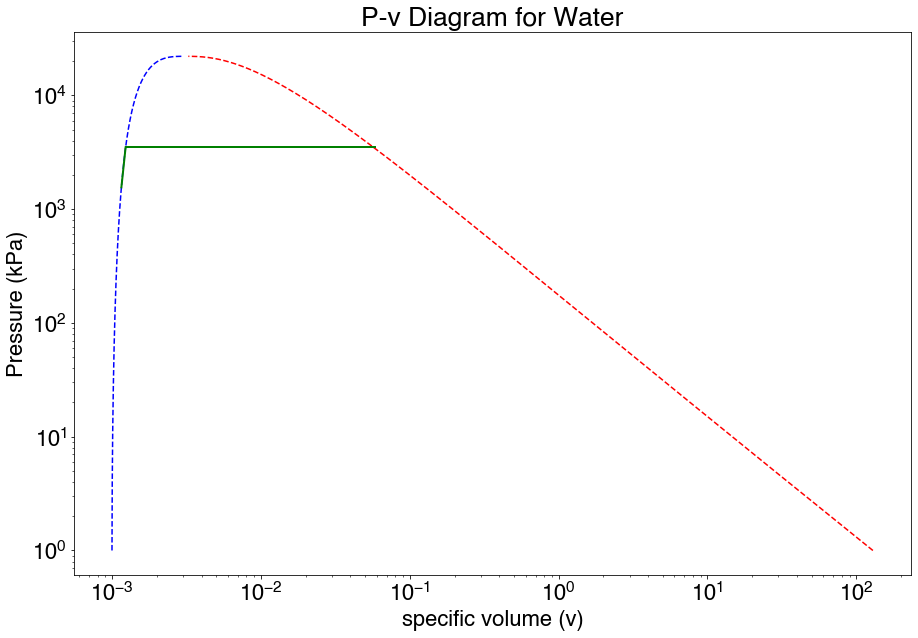

In [172]:
font = {'family' : 'Helvetica',
        'size'   : 22}
plt.figure(figsize=(15,10))
plt.xscale("log")
plt.yscale("log")
plt.title('P-v Diagram for Water')
plt.rc('font', **font)
plt.plot(vf,p, 'b--')
plt.plot(vg,p,'r--')
plt.plot([v1,v2],[p1,p2],'g',linewidth=2)
plt.plot([v2,v3],[p2,p3],'g',linewidth=2)
plt.ylabel('Pressure (kPa)')
plt.xlabel('specific volume (v)')

Text(0.5, 0, 'specific volume (v)')

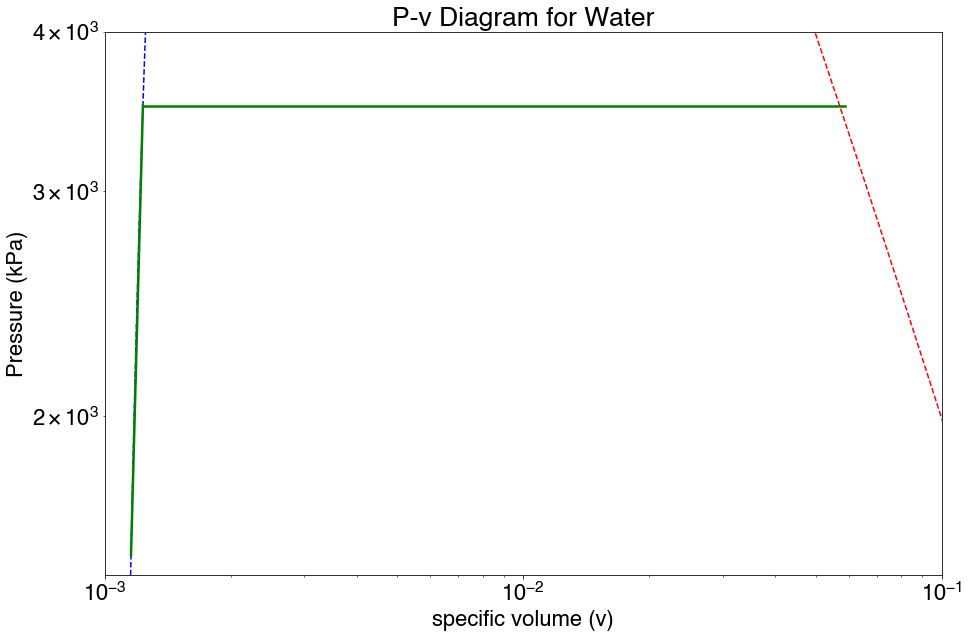

In [173]:
font = {'family' : 'Helvetica',
        'size'   : 22}
plt.figure(figsize=(15,10))
plt.xscale("log")
plt.yscale("log")
plt.title('P-v Diagram for Water')
plt.rc('font', **font)
plt.axis([0.001, 0.1, 1500, 4000])
plt.plot(vf,p, 'b--')
plt.plot(vg,p,'r--')
plt.plot([v1,v2],[p1,p2],'g',linewidth=2.5)
plt.plot([v2,v3],[p2,p3],'g',linewidth=2.5)
plt.ylabel('Pressure (kPa)')
plt.xlabel('specific volume (v)')